# Regresión Lineal: Método de la Matriz Inversa

Este ejercicio explora cómo realizar una regresión lineal con TensorFlow utilizando la matriz inversa.

Dado el sistema $ A \cdot x = y $, la forma inversa de matriz de regresión lineal (ecuaciones para sistemas sobredeterminados) se da resolviendo para x de la siguiente manera.

$$x = \left( A^{T} \cdot A \right)^{-1} \cdot A^{T} \cdot y$$

Como recordatorio, aquí, $x$ es nuestra matriz de parámetros (vector de longitud $F+1$, donde $F$ es el número de características). Aquí, $A$, nuestro diseño de la matriz toma forma.

$$
A=
\begin{bmatrix}
    1 & x_{11} & x_{12} & \dots  & x_{1F} \\
    1 & x_{21} & x_{22} & \dots  & x_{2F} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_{n1} & x_{n2} & \dots  & x_{nF}
\end{bmatrix}
$$

Donde $F$ es el número de características independientes, y $n$ es el número de puntos. Para un sistema sobredeterminado, $n>F$. Recuerde que un punto observado en nuestro sistema tendrá una longitud de $F+1$ y el punto $i^{th}$ se verá como

$$point_{i} = \left( y_{i}, x_{i1}, x_{i2}, \dots, x_{iF} \right)$$

Para esta receta, consideraremos solo un sistema bidimensional ($F=1$), sde modo que podamos trazar los resultados al final.

Comenzamos cargando las bibliotecas necesarias.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

A continuación comenzamos una sesión del grafo.

In [2]:
sess = tf.Session()

Para fines de ilustración, generamos datos al azar para ajustar.

Los valores de x serán una secuencia de 100 valores espaciados uniformemente entre 0 y 100.

Los valores de y se ajustarán a la línea: $y=x$, pero agregaremos un error normalmente distribuido de acuerdo con $N(0,1)$.

In [3]:
# Crear los datos
x_vals = np.linspace(0, 10, 100)
y_vals = x_vals + np.random.normal(0, 1, 100)

Creamos la matriz de diseño $A$, que será una columna de unos y los valores de x.

In [4]:
# Crear matriz de diseño
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1, 100)))
A = np.column_stack((x_vals_column, ones_column))

Ahora creamos los valores de y como una matriz con Numpy.

Una vez que tenemos los valores de y y la matriz de diseño, creamos tensores a partir de ellos.

In [5]:
# Format the y matrix
y = np.transpose(np.matrix(y_vals))

# Create tensors
A_tensor = tf.constant(A)
y_tensor = tf.constant(y)

Ahora resolvemos la matriz de parámetros con operaciones TensorFlow.

In [6]:
# Matrix inverse solution
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
tA_A_inv = tf.matrix_inverse(tA_A)
product = tf.matmul(tA_A_inv, tf.transpose(A_tensor))
solution = tf.matmul(product, y_tensor)

Ejecute las soluciones y extraiga la pendiente y la intersección de la matriz de parámetros.

In [7]:
solution_eval = sess.run(solution)

# Extract coefficients
slope = solution_eval[0][0]
y_intercept = solution_eval[1][0]

Ahora imprimimos la solución que encontramos y creamos una línea de mejor ajuste.

In [8]:
print('slope: ' + str(slope))
print('y_intercept: ' + str(y_intercept))

# Get best fit line
best_fit = []
for i in x_vals:
  best_fit.append(slope*i+y_intercept)

slope: 0.9957482715636298
y_intercept: 0.13630601276318063


Usamos Matplotlib para trazar los resultados.

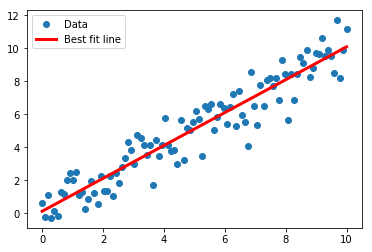

In [9]:
# Plot the results
plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.show()